In [59]:
import torch
from torch.autograd import Variable

import argparse
import os
from decoder import OrientationDecoder
from data_loader_utils import data_iterator
from data_generators import get_quadratures, get_orientation_map
from decoder_nonlinear import OrientationDecoder as OrientationDecoderNonlinear
from decoder_upsample import OrientationDecoder as OrientationDecoderUpsample
from decoder_upsample_nonlinear import OrientationDecoder as OrientationDecoderUpsampleNonlinear
from test_decoder import *

#visualize
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from colorspacious import cspace_convert
import numpy as np
from matplotlib import pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"]="3"
%matplotlib inline


# Plot the decoded orientations along the lines of interest.

This is it! Do DNNs see geometric illusions?

In [2]:
### First we select the locations of the trained model and the illusions

ILLUSIONS_LOCATION = "/home/abenjamin/DNN_illusions/data/illusions/"
MODELS_LOCATION = "/home/abenjamin/DNN_illusions/data/models/"

### Now we select which model version we want. Which layer are we reading from?
LAYER = 4

maxpool_indices = [ 4, 9, 16, 23, 30]
assert LAYER in maxpool_indices

model_name = MODELS_LOCATION + "many_white_on_black_lines_layer_{}.pt".format(LAYER)


Now load the model

In [4]:
def load_model(model_path, layer):
    model = OrientationDecoderUpsampleNonlinear(layer)

    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

model = load_model(model_name, LAYER)

Now we load all the illusions and pass them through the network.

In [30]:
#a list of tuples of (input_image (3x224x224), orientation_image (2x224x224), target_orientation_image (2x224x224))
input_output_target = pass_test_images(model, ILLUSIONS_LOCATION, gpu=  False)


Let's choose an illusion

In [31]:
ILLUSION_NUMBER = 1
original_input, decoded_orient, target_orient = input_output_target[ILLUSION_NUMBER]

In [48]:
# get the orientation of the target
filts = get_quadratures(15)
# note that we invert to get the map
target_orient = get_orientation_map(1-np.mean(check_on_float_scale(original_input),axis=0), filts)

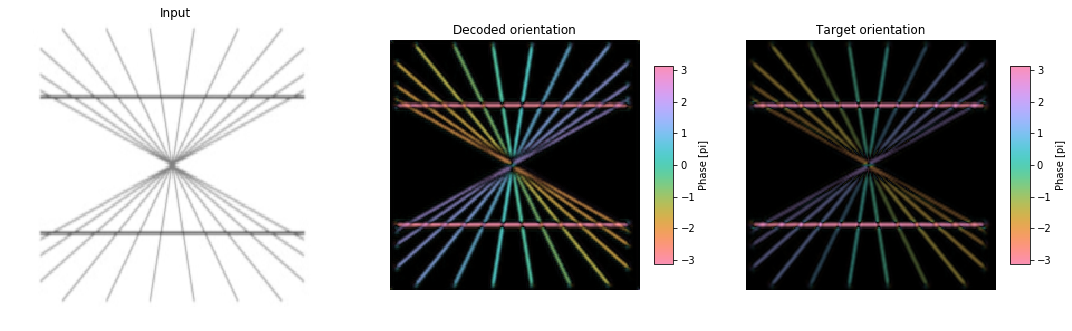

In [49]:
# Let's take a look
save_and_visualize([(original_input, decoded_orient, target_orient)])

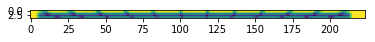

In [33]:
plt.imshow(original_input[0][55:60])

plt.show()


In [34]:
THIS_ILLUSION_SLICE_LOC = 57

In [69]:
def give_angle_on_slice(im_slice):
    assert im_slice.shape[0] == 2  #shape  2xn
    angle = np.arctan2(im_slice[1], im_slice[0])
    return angle

def plot_angle(angle, shift_by_pi = True):
    if shift_by_pi:
        angle = angle + np.pi
    angle[angle>np.pi] = angle[angle>np.pi]-2*np.pi
    plt.plot(angle,'.')
    plt.ylabel("Decoded Angle")
    plt.xlabel("Pixel #")
    plt.tight_layout()


For the decoded orientation:

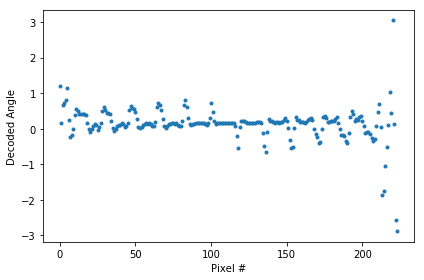

In [81]:
angle_at_slice = give_angle_on_slice(decoded_orient[:,THIS_ILLUSION_SLICE_LOC])
plot_angle(angle_at_slice)

For the actual (target) orientation:

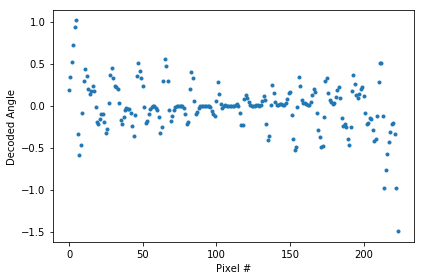

In [82]:
angle_at_slice_target = give_angle_on_slice(target_orient[:,THIS_ILLUSION_SLICE_LOC])
plot_angle(angle_at_slice_target)

The difference:

(-0.5, 0.5)

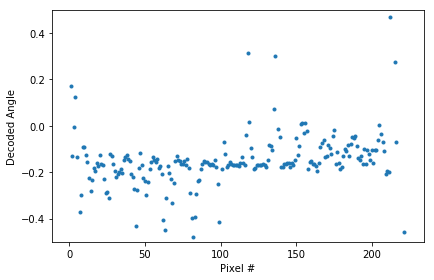

In [83]:
plot_angle(angle_at_slice_target - angle_at_slice, False)
plt.ylim(-.5,.5)

### Let's try taking the difference between the orientation at the top and bottom of the image

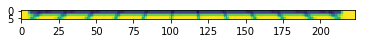

In [76]:
plt.imshow(original_input[0][164:170])

plt.show()

In [77]:
BOTTOM_SLICE_LOC = 165

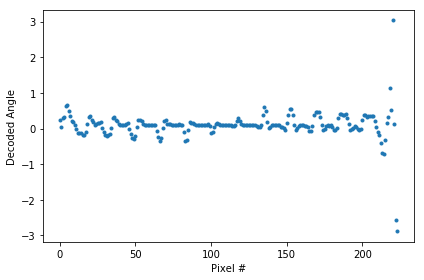

In [84]:
angle_at_slice_bottom = give_angle_on_slice(decoded_orient[:,BOTTOM_SLICE_LOC])
plot_angle(angle_at_slice_bottom)

(-0.5, 0.5)

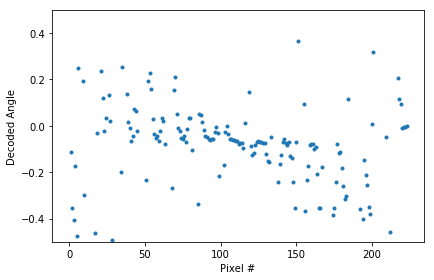

In [85]:
plot_angle(angle_at_slice_bottom - angle_at_slice, False)
plt.ylim(-.5,.5)